In [ ]:
# # 🌸 Iris Flower Classifier — KNN Project for Beginners

#This notebook will help you **learn machine learning from scratch** by building a flower classification model using the classic Iris dataset. Perfect for beginners!

#You'll learn:
#- 📊 How to explore and visualize a dataset
#- ⚙️ Why scaling features matters in KNN
#- 🧠 How to build and tune a K-Nearest Neighbors classifier
#- 📈 How to evaluate your model using accuracy and confusion matrix

In [ ]:
## 🧰 Step 1: Import Required Libraries

# 📦 Basic packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 🧠 Scikit-learn tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
## 🌼 Step 2: Load and Explore the Iris Dataset
# Load dataset

dataset = load_iris()
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y = pd.Series(dataset.target, name = 'species')

# Show class names
print('Target classes:', dataset.target_names)

# Preview Data
X.head()

Target classes: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Missing values: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


Text(0.5, 1.02, 'Iris Dataset Feature Relationship')

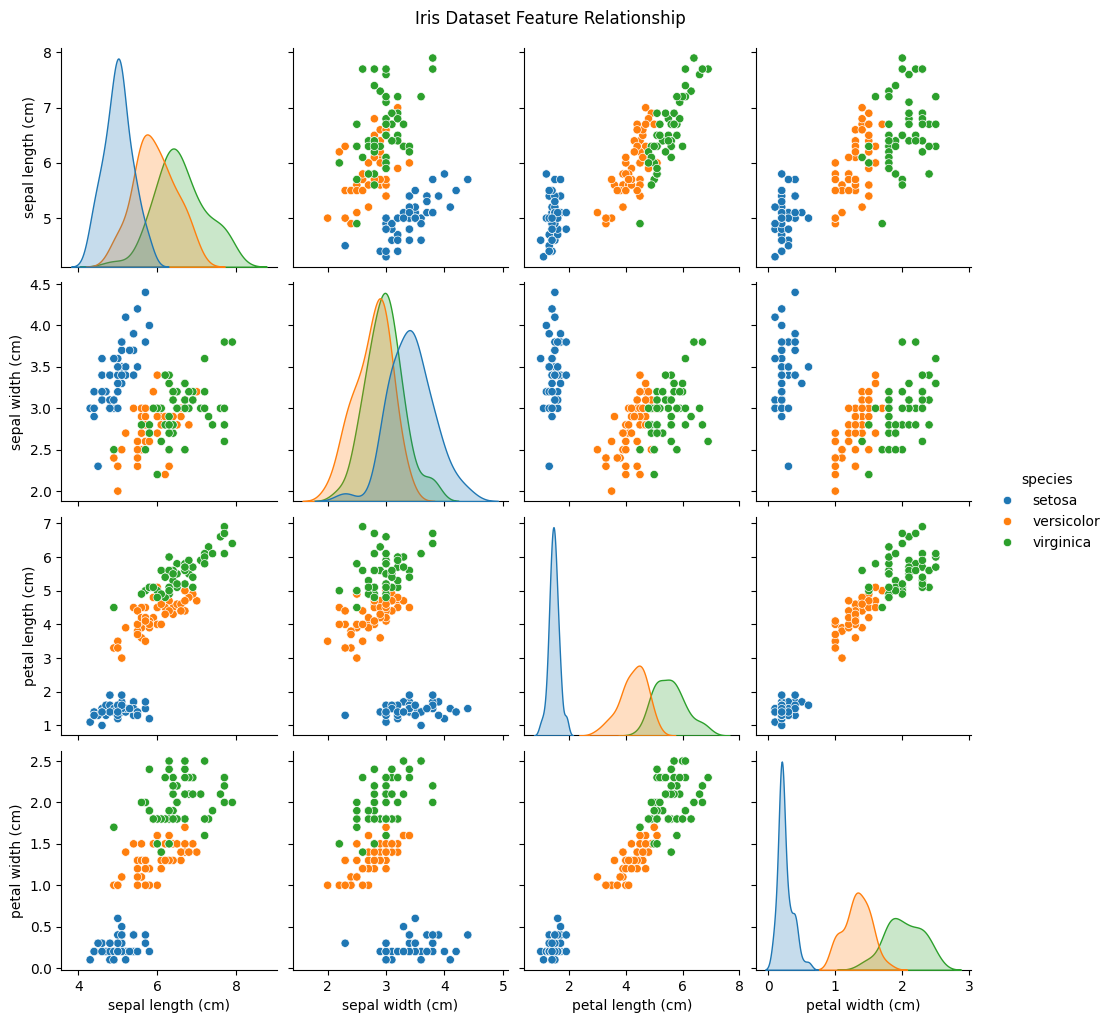

In [7]:
## 🔍 Step 3: Explore the Data (EDA)

# Check missing values
print('Missing values:', X.isnull().sum())

# Pairplot of all features
df_viz = pd.concat([X, y.map(dict(enumerate(dataset.target_names)))], axis = 1)
df_viz.columns = list(X.columns) + ['species']
sns.pairplot(df_viz, hue = 'species')
plt.suptitle('Iris Dataset Feature Relationship', y = 1.02)



Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Confusion Matrix')

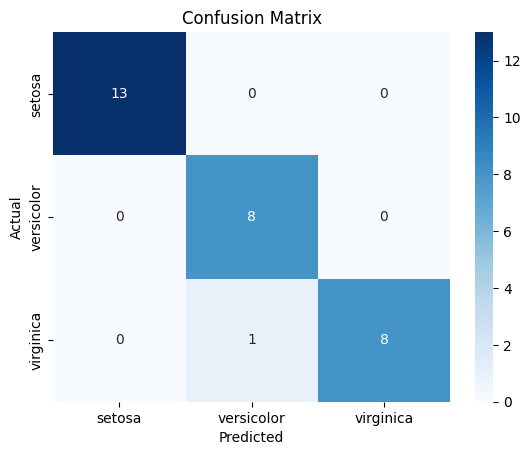

In [11]:
##⚖️ Step 4: Scale the features 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##✂️ Step 5: Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 43)

## 🧠 Step 6: Train the KNN Classifier
# Create and fit the model 
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

## ✔️ Step 7: Evaluate the model
# Make predictions 
y_pred = knn.predict(X_test)

# Show accuracy and full classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names= dataset.target_names) )

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt = 'd', xticklabels= dataset.target_names, yticklabels= dataset.target_names, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')






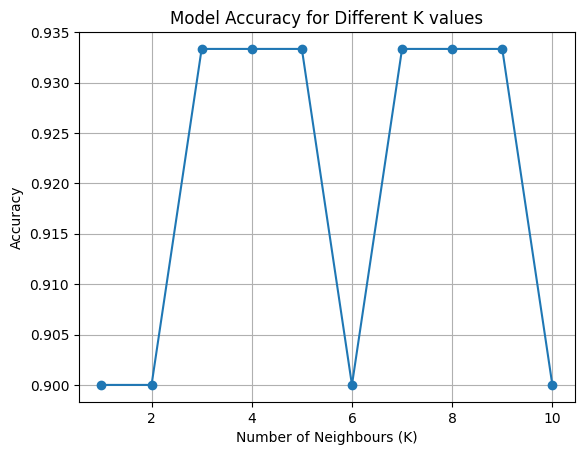

In [10]:
## 🧪 Step 8: Test Different Values of K (Hyperparameter Tuning)
accuracies = []
k_range = range(1, 11)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

#Plot results 
plt.plot(k_range, accuracies, marker = 'o')
plt.title('Model Accuracy for Different K values')
plt.xlabel('Number of Neighbours (K)')
plt.ylabel('Accuracy')
plt.grid(True)



